In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import csv
from csv import writer
import matplotlib.pyplot as plt
import re
import seaborn as sns

Crawling Data dari Twiter Menggunakna liblary snscrape

In [ ]:
query = "pelecehan seksual universitas until:2022-12-31 since:2015-01-01"
tweets = []
limits = 2000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    #print(vars(tweet))
    #break

    if len(tweets)== limits:
        break
    else:
        tweets.append([tweet.date, tweet.user.username, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])

In [10]:
df.to_csv('tweet_1.csv')
df.describe()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18012\2976936189.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,Date,User,Tweet
count,1411,1411,1411
unique,1401,854,1407
top,2019-10-07 04:21:33+00:00,kumparan,Agensi Bantah Jo Min Ki Dipecat dari Universit...
freq,2,39,3
first,2015-05-02 01:14:04+00:00,NaN,NaN
last,2022-12-29 08:30:40+00:00,NaN,NaN


In [127]:
# df = pd.read_csv('tweet_1.csv')
# words = ['wanita','Wanita','Perempuan','perempuan','korban wanita','Korban wanita']
# df = df[df['Tweet'].apply(lambda x: any(word in x for word in words))]

In [11]:
df.describe()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18012\3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,Date,User,Tweet
count,1411,1411,1411
unique,1401,854,1407
top,2019-10-07 04:21:33+00:00,kumparan,Agensi Bantah Jo Min Ki Dipecat dari Universit...
freq,2,39,3
first,2015-05-02 01:14:04+00:00,NaN,NaN
last,2022-12-29 08:30:40+00:00,NaN,NaN


In [12]:
query = "kekerasan seksual universitas until:2022-12-31 since:2015-01-01"
tweets = []
limits = 2000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    #print(vars(tweet))
    #break

    if len(tweets)== limits:
        break
    else:
        tweets.append([tweet.date, tweet.user.username, tweet.content])

df2 = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])



In [13]:
df2.to_csv('tweet_2.csv')

In [14]:
# df2 = pd.read_csv('tweet_3.csv')
# words = ['Perempuan','perempuan','wanita','Wanita']
# df2 = df[df['Tweet'].apply(lambda x: any(word in x for word in words))]

In [15]:
df2

,Date,User,Tweet
0,2022-12-29 08:30:40+00:00,UMufris,Kekerasan | sexual consent | Muslimah news\nFa...
1,2022-12-29 05:15:01+00:00,WartaEkonomi,"Bejat! Dosen di Padang Lecehkan 8 Mahasiswa, K..."
2,2022-12-28 05:59:33+00:00,officialunismuh,"BERITA VIDEO: Cegah Kekerasan Seksual di PT, B..."
3,2022-12-27 10:45:31+00:00,AuisGrand,Pihak kepolisian belum bisa memproses hukum do...
4,2022-12-27 10:43:33+00:00,KompasKlasika,Pihak kepolisian belum bisa memproses hukum do...
...,...,...,...
1565,2015-03-05 04:06:24+00:00,Onai_Oxygen,3 Ahli Psikolog Diskusi Kekerasan Seksual Anak...
1566,2015-03-05 04:05:35+00:00,KoyanBtm,3 Ahli Psikolog Diskusi Kekerasan Seksual Anak...
1567,2015-02-02 02:34:13+00:00,bellaganora,Seminar kekerasan seksual 'WHEN I FOUND… (w/ R...
1568,2015-02-02 02:34:12+00:00,alipiong,seminar kekerasan seksual 'when i found them'…...


Data Disatukan menjadi satu bentuk File

In [53]:
df3 = pd.concat([df,df2])
df3.to_csv('tweet_3.csv')

NameError: name 'df' is not defined

In [52]:
df3.describe()

NameError: name 'df3' is not defined

In [4]:
import html
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [5]:
data = pd.read_csv('tweet_3.csv')
data.head()
data.describe()

,Unnamed: 0
count,2981.000000
mean,746.870178
std,433.994529
min,0.000000
25%,372.000000
50%,745.000000
75%,1117.000000
max,1569.000000


Menghilangkan Duplicate

In [6]:
new_data = data.drop_duplicates('Tweet',keep='first') 
new_data.describe()
#delete the duplicates by dropping them and store the result value to a new variable

,Unnamed: 0
count,2799.000000
mean,741.307610
std,429.907389
min,0.000000
25%,373.500000
50%,736.000000
75%,1103.000000
max,1569.000000


In [7]:
#new_sample = dataframe baru yang telah dihilangkan duplikasinya
new_data.to_csv('tweet_3_cleaned.csv', index = False)
new_sample = pd.read_csv('tweet_3_cleaned.csv')
tweets = new_sample['Tweet']
tweets

0       Kekerasan | sexual consent | Muslimah news\nFa...
1       Menteri PPPA, Bintang Puspayoga mengutuk keras...
2       Ratusan mahasiswa berunjuk rasa di depan Gedun...
3       Pihak kepolisian belum bisa memproses hukum do...
4       Pihak kepolisian belum bisa memproses hukum do...
                              ...                        
2794    3 Ahli Psikolog Diskusi Kekerasan Seksual Anak...
2795    3 Ahli Psikolog Diskusi Kekerasan Seksual Anak...
2796    Seminar kekerasan seksual 'WHEN I FOUND… (w/ R...
2797    seminar kekerasan seksual 'when i found them'…...
2798    Seminar kekerasan seksual… (w/ Putranti, Safir...
Name: Tweet, Length: 2799, dtype: object

In [8]:
for i in range (len(tweets)):
  tweets[i] = re.sub(r'(@[A-Za-z0–9_]+)|[^\w\s]|#|http\S+', ' ',str(tweets[i]))


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16440\922256365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets[i] = re.sub(r'(@[A-Za-z0–9_]+)|[^\w\s]|#|http\S+', ' ',str(tweets[i]))


Memisahkan Kolom Tahun pada data

In [9]:
for i in range (len(tweets)):
    df5 = pd.read_csv('tweet_3_cleaned.csv')
    year = df5['Date']
def getYear(s):
    return s.split("-")[0]
  
for i in range (len(year)):
  year[i] = str(year[i])
  year[i] = getYear(year[i])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16440\1873580263.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year[i] = str(year[i])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16440\1873580263.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year[i] = getYear(year[i])


In [10]:
dfread = df5

In [11]:
dfread

,Unnamed: 0,Date,User,Tweet
0,0,2022,UMufris,Kekerasan | sexual consent | Muslimah news\nFa...
1,1,2022,suaradotcom,"Menteri PPPA, Bintang Puspayoga mengutuk keras..."
2,2,2022,Metro_TV,Ratusan mahasiswa berunjuk rasa di depan Gedun...
3,3,2022,AuisGrand,Pihak kepolisian belum bisa memproses hukum do...
4,4,2022,KompasKlasika,Pihak kepolisian belum bisa memproses hukum do...
...,...,...,...,...
2794,1565,2015,Onai_Oxygen,3 Ahli Psikolog Diskusi Kekerasan Seksual Anak...
2795,1566,2015,KoyanBtm,3 Ahli Psikolog Diskusi Kekerasan Seksual Anak...
2796,1567,2015,bellaganora,Seminar kekerasan seksual 'WHEN I FOUND… (w/ R...
2797,1568,2015,alipiong,seminar kekerasan seksual 'when i found them'…...


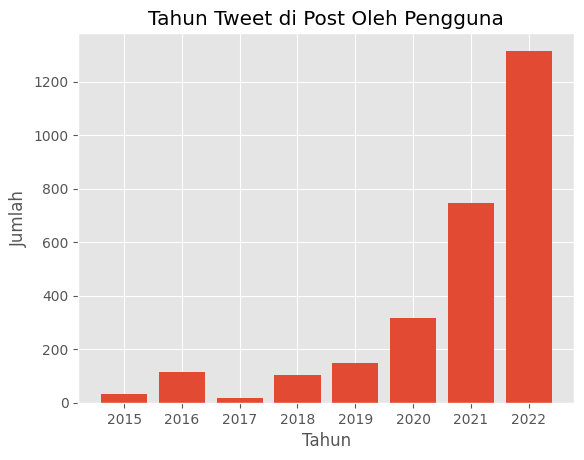

In [12]:
data_tahun = dfread.groupby(by="Date").count()
data_tahun

x = list(data_tahun.index)
y = list(data_tahun['Unnamed: 0'].values)


plt.style.use('ggplot')
plt.title('Tahun Tweet di Post Oleh Pengguna')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.bar(x,y)
plt.show()

In [13]:
dfread

,Unnamed: 0,Date,User,Tweet
0,0,2022,UMufris,Kekerasan | sexual consent | Muslimah news\nFa...
1,1,2022,suaradotcom,"Menteri PPPA, Bintang Puspayoga mengutuk keras..."
2,2,2022,Metro_TV,Ratusan mahasiswa berunjuk rasa di depan Gedun...
3,3,2022,AuisGrand,Pihak kepolisian belum bisa memproses hukum do...
4,4,2022,KompasKlasika,Pihak kepolisian belum bisa memproses hukum do...
...,...,...,...,...
2794,1565,2015,Onai_Oxygen,3 Ahli Psikolog Diskusi Kekerasan Seksual Anak...
2795,1566,2015,KoyanBtm,3 Ahli Psikolog Diskusi Kekerasan Seksual Anak...
2796,1567,2015,bellaganora,Seminar kekerasan seksual 'WHEN I FOUND… (w/ R...
2797,1568,2015,alipiong,seminar kekerasan seksual 'when i found them'…...


In [14]:
searchfor = ['laki','Laki','Laki-laki','pria','Pria']
dfread["Bool"] = dfread['Tweet'].apply(lambda x: 1 if any(i in x for i in searchfor) else 0)
df_men = dfread.loc[dfread['Bool'] == 1]
df_men.count()

Unnamed: 0    16
Date          16
User          16
Tweet         16
Bool          16
dtype: int64

In [15]:
searchfor = ['wanita','Wanita','perempuan','Perempuan','gadis']
dfread["Bool"] = dfread['Tweet'].apply(lambda x: 1 if any(i in x for i in searchfor) else 0)
df_women = dfread.loc[dfread['Bool'] == 1]
df_women.count()

Unnamed: 0    123
Date          123
User          123
Tweet         123
Bool          123
dtype: int64

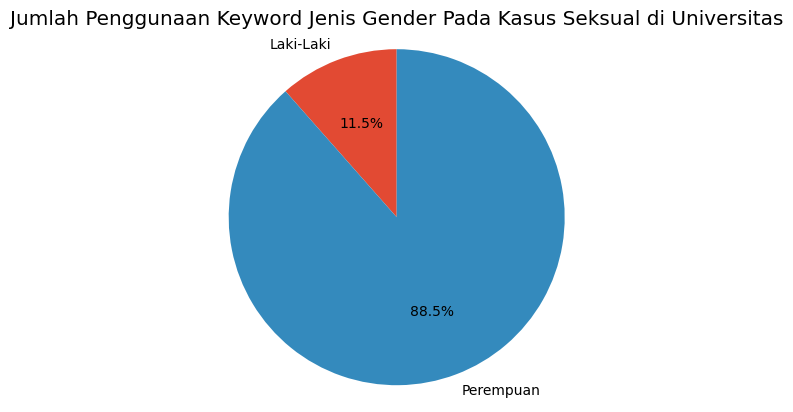

In [16]:
plt.title('Jumlah Penggunaan Keyword Jenis Gender Pada Kasus Seksual di Universitas')
plt.pie(
    [df_men.shape[0], df_women.shape[0]],
    labels=['Laki-Laki','Perempuan'],
    autopct='%1.1f%%',
    startangle=90
    )
plt.axis('equal')
plt.grid(True) # garis background untuk mempermudah pembacaan
plt.show()

In [17]:
dfread

,Unnamed: 0,Date,User,Tweet,Bool
0,0,2022,UMufris,Kekerasan | sexual consent | Muslimah news\nFa...,0
1,1,2022,suaradotcom,"Menteri PPPA, Bintang Puspayoga mengutuk keras...",0
2,2,2022,Metro_TV,Ratusan mahasiswa berunjuk rasa di depan Gedun...,0
3,3,2022,AuisGrand,Pihak kepolisian belum bisa memproses hukum do...,0
4,4,2022,KompasKlasika,Pihak kepolisian belum bisa memproses hukum do...,0
...,...,...,...,...,...
2794,1565,2015,Onai_Oxygen,3 Ahli Psikolog Diskusi Kekerasan Seksual Anak...,0
2795,1566,2015,KoyanBtm,3 Ahli Psikolog Diskusi Kekerasan Seksual Anak...,0
2796,1567,2015,bellaganora,Seminar kekerasan seksual 'WHEN I FOUND… (w/ R...,0
2797,1568,2015,alipiong,seminar kekerasan seksual 'when i found them'…...,0


In [18]:
searchfor =['Universitas Negeri Semarang','negeri semarang']
dfread["label"] = dfread['Tweet'].apply(lambda x: 'UNS' if any(i in x for i in searchfor) else 0)
df_uns = dfread.loc[dfread['label'] == 'UNS']

df_uns['total'] = df_uns['Tweet'].count()

df_uns.drop('Date', axis=1, inplace=True)
df_uns.drop('User', axis=1, inplace=True)
df_uns.drop('Tweet', axis=1, inplace=True)
df_uns.drop('Unnamed: 0', axis=1, inplace=True)
# df_uns.drop('Unnamed: 0.1', axis=1, inplace=True)
df_uns.drop('Bool', axis=1, inplace=True)
df_uns = df_uns.drop_duplicates()



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16440\1465969713.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uns['total'] = df_uns['Tweet'].count()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16440\1465969713.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uns.drop('Date', axis=1, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16440\1465969713.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [18]:
df_uns

,label,total
365,UNS,216


In [35]:
searchfor =['Universitas Gunadarma', 'gundar']
dfread["label"] = dfread['Tweet'].apply(lambda x: 'Gunadarma' if any(i in x for i in searchfor) else 0)
df_gundar = dfread.loc[dfread['label'] == 'Gunadarma']

df_gundar['total'] = df_gundar['Tweet'].count()

df_gundar.drop('Date', axis=1, inplace=True)
df_gundar.drop('User', axis=1, inplace=True)
df_gundar.drop('Tweet', axis=1, inplace=True)
df_gundar.drop('Unnamed: 0', axis=1, inplace=True)
# df_gundar.drop('Unnamed: 0.1', axis=1, inplace=True)
df_gundar.drop('Bool', axis=1, inplace=True)

df_gundar = df_gundar.drop_duplicates()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15132\2942077788.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gundar['total'] = df_gundar['Tweet'].count()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15132\2942077788.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gundar.drop('Date', axis=1, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15132\2942077788.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [36]:
df_gundar

,label,total
37,Gunadarma,142


In [20]:
searchfor =['Universitas Andalas', 'andalas']
dfread["label"] = dfread['Tweet'].apply(lambda x: 'Andalas' if any(i in x for i in searchfor) else 0)
# df = df.drop(columns='Bool')
df_andalas = dfread.loc[dfread['label'] == 'Andalas']

df_andalas['total'] = df_andalas['Tweet'].count()

df_andalas.drop('Date', axis=1, inplace=True)
df_andalas.drop('User', axis=1, inplace=True)
df_andalas.drop('Tweet', axis=1, inplace=True)
df_andalas.drop('Unnamed: 0', axis=1, inplace=True)
# df_andalas.drop('Unnamed: 0.1', axis=1, inplace=True)
df_andalas.drop('Bool', axis=1, inplace=True)

df_andalas = df_andalas.drop_duplicates()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15132\1905473794.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_andalas['total'] = df_andalas['Tweet'].count()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15132\1905473794.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_andalas.drop('Date', axis=1, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15132\1905473794.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [21]:
df_andalas

,label,total
1,Andalas,46


In [24]:
searchfor =['Universitas Brawijaya','brawijaya']
dfread["label"] = dfread['Tweet'].apply(lambda x: 'Brawijaya' if any(i in x for i in searchfor) else 0)
df_ub = dfread.loc[dfread['label'] == 'Brawijaya']

#df_ub = dfread.loc[dfread['label'] == 'Brawijaya']

df_ub['total'] = df_ub['Tweet'].count()

df_ub.drop('Date', axis=1, inplace=True)
df_ub.drop('User', axis=1, inplace=True)
df_ub.drop('Tweet', axis=1, inplace=True)
df_ub.drop('Unnamed: 0', axis=1, inplace=True)
# df_ub.drop('Unnamed: 0.1', axis=1, inplace=True)
df_ub.drop('Bool', axis=1, inplace=True)

df_unbraw = df_ub.drop_duplicates()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15132\2779215781.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ub['total'] = df_ub['Tweet'].count()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15132\2779215781.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ub.drop('Date', axis=1, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15132\2779215781.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [25]:
df_unbraw

,label,total
186,Brawijaya,113


In [31]:
searchfor =['Universitas Gadjah Mada', 'UGM']
dfread["label"] = dfread['Tweet'].apply(lambda x: 'Gadjah Mada' if any(i in x for i in searchfor) else 0)

df_gadjahMada = dfread.loc[dfread['label'] == 'Gadjah Mada']

df_gadjahMada['total'] = df_gadjahMada['Tweet'].count()

df_gadjahMada.drop('Date', axis=1, inplace=True)
df_gadjahMada.drop('User', axis=1, inplace=True)
df_gadjahMada.drop('Tweet', axis=1, inplace=True)
df_gadjahMada.drop('Unnamed: 0', axis=1, inplace=True)
# df_gadjahMada.drop('Unnamed: 0.1', axis=1, inplace=True)
df_gadjahMada.drop('Bool', axis=1, inplace=True)

df_gadjahMada = df_gadjahMada.drop_duplicates()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15132\1521725571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gadjahMada['total'] = df_gadjahMada['Tweet'].count()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15132\1521725571.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gadjahMada.drop('Date', axis=1, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15132\1521725571.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [28]:
df_gadjahMada

,label,total
117,Gadjah Mada,103


In [32]:
searchfor =['Universitas Padjadjaran', 'padjadjaran']
dfread["label"] = dfread['Tweet'].apply(lambda x: 'Padjadjaran' if any(i in x for i in searchfor) else 0)

df_padjadjaran = dfread.loc[dfread['label'] == 'Padjadjaran']

df_padjadjaran['total'] = df_padjadjaran['Tweet'].count()

df_padjadjaran.drop('Date', axis=1, inplace=True)
df_padjadjaran.drop('User', axis=1, inplace=True)
df_padjadjaran.drop('Tweet', axis=1, inplace=True)
df_padjadjaran.drop('Unnamed: 0', axis=1, inplace=True)
# df_gadjahMada.drop('Unnamed: 0.1', axis=1, inplace=True)
df_padjadjaran.drop('Bool', axis=1, inplace=True)

df_padjadjaran = df_padjadjaran.drop_duplicates()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15132\1665891588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_padjadjaran['total'] = df_padjadjaran['Tweet'].count()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15132\1665891588.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_padjadjaran.drop('Date', axis=1, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15132\1665891588.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [33]:
df_padjadjaran

,label,total
419,Padjadjaran,44


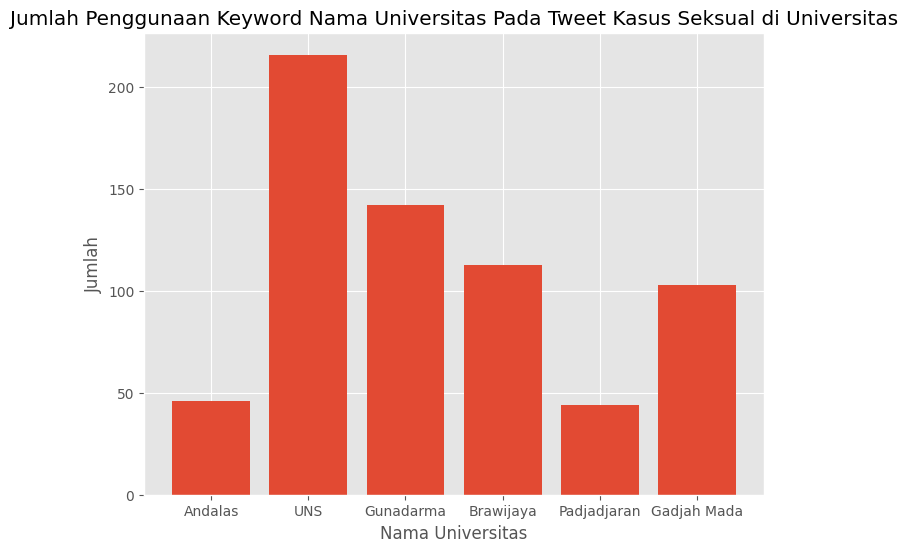

In [37]:
df_univ = pd.concat([df_andalas, df_uns,df_gundar,df_ub,df_padjadjaran, df_gadjahMada])

y = df_univ['total']
x = df_univ['label']

plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.title('Jumlah Penggunaan Keyword Nama Universitas Pada Tweet Kasus Seksual di Universitas')
plt.xlabel('Nama Universitas')
plt.ylabel('Jumlah')
plt.bar(x,y)
plt.show()
